<a href="https://colab.research.google.com/github/ReeCodingHub/GenAI/blob/main/Types_of_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bernoulli Distribution**

   Survived
0         0
1         1
2         1
3         1
4         0

Estimated probability of survival (p): 0.384


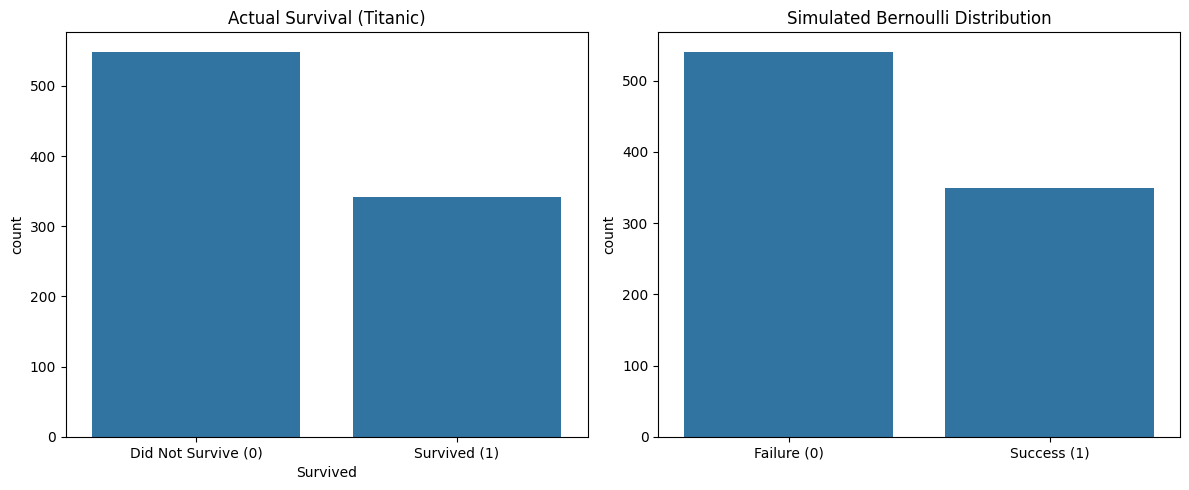


Total Passengers: 891
Actual survivors: 342
Simulated survivors: 350
Difference: 8


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Preview
print(df[['Survived']].head())

# Step 1: Extract binary outcome
data = df['Survived']  # 1 = survived, 0 = did not survive

# Step 2: Estimate parameter p (probability of survival)
p_hat = data.mean()
print(f"\nEstimated probability of survival (p): {p_hat:.3f}")

# Step 3: Simulate Bernoulli distribution
n = len(data)
simulated = bernoulli.rvs(p_hat, size=n)

# Step 4: Visualize real vs simulated
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Real data plot
sns.countplot(x=data, ax=ax[0])
ax[0].set_title('Actual Survival (Titanic)')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Did Not Survive (0)', 'Survived (1)'])

# Simulated plot
sns.countplot(x=simulated, ax=ax[1])
ax[1].set_title('Simulated Bernoulli Distribution')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Failure (0)', 'Success (1)'])

plt.tight_layout()
plt.show()

# Step 5: Compare stats
real_success = data.sum()
sim_success = simulated.sum()

print(f"\nTotal Passengers: {n}")
print(f"Actual survivors: {real_success}")
print(f"Simulated survivors: {sim_success}")
print(f"Difference: {abs(real_success - sim_success)}")


**Binomial Distribution**

Total Female Passengers: 314
Female Survivors: 233
Estimated Probability of Survival (p): 0.742


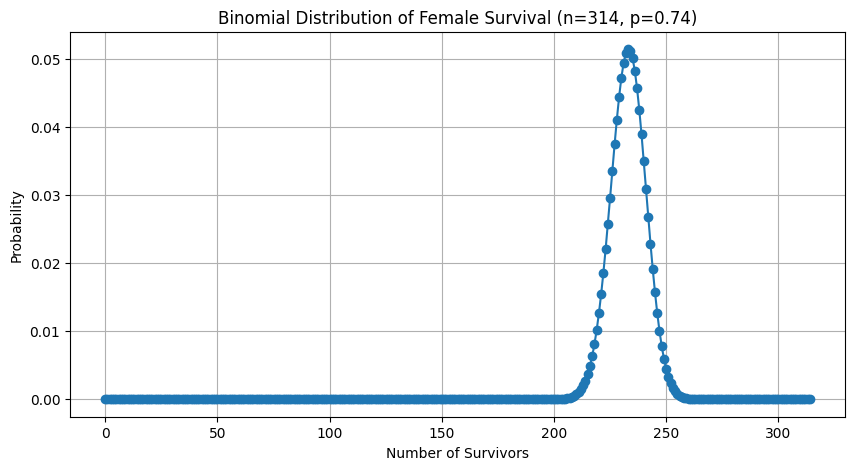

In [2]:

from scipy.stats import binom


# Filter to female passengers
females = df[df['Sex'] == 'female']

# Total number of female passengers
n = len(females)

# Number of female survivors
k = females['Survived'].sum()

# Empirical probability of survival
p_hat = k / n

print(f"Total Female Passengers: {n}")
print(f"Female Survivors: {k}")
print(f"Estimated Probability of Survival (p): {p_hat:.3f}")

# Binomial PMF: What is the probability of x survivors out of n, for x in 0..n
x = range(0, n+1)
probs = binom.pmf(x, n, p_hat)

# Plot Binomial Distribution
plt.figure(figsize=(10, 5))
plt.plot(x, probs, marker='o')
plt.title(f'Binomial Distribution of Female Survival (n={n}, p={p_hat:.2f})')
plt.xlabel('Number of Survivors')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


In [4]:

import math


# Step 1: Extract n and k from data
n = len(females)  # total trials
k = females['Survived'].sum()  # number of successes
p = k / n  # empirical probability of success
q = 1 - p

# Step 2: Binomial Statistics
mean = n * p
var = n * p * q
std_dev = math.sqrt(var)
mode = math.floor((n + 1) * p)
skewness = (1 - 2*p) / std_dev
kurtosis_excess = (1 - 6*p*q) / var

# Step 3: Print stats
print("🎯 Binomial Distribution Stats (Female Survival on Titanic)")
print(f"Total Female Passengers (n): {n}")
print(f"Female Survivors (k): {k}")
print(f"Probability of Survival (p): {p:.3f}\n")

print(f"Mean (μ = np): {mean:.2f}")
print(f"Variance (σ² = npq): {var:.2f}")
print(f"Standard Deviation (σ): {std_dev:.2f}")
print(f"Mode: {mode}")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis (Excess): {kurtosis_excess:.3f}")


🎯 Binomial Distribution Stats (Female Survival on Titanic)
Total Female Passengers (n): 314
Female Survivors (k): 233
Probability of Survival (p): 0.742

Mean (μ = np): 233.00
Variance (σ² = npq): 60.11
Standard Deviation (σ): 7.75
Mode: 233
Skewness: -0.062
Kurtosis (Excess): -0.002


**Poisson Distribution**


Average bike rentals per hour (λ): 189.46


/tmp/ipython-input-9-3020785810.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


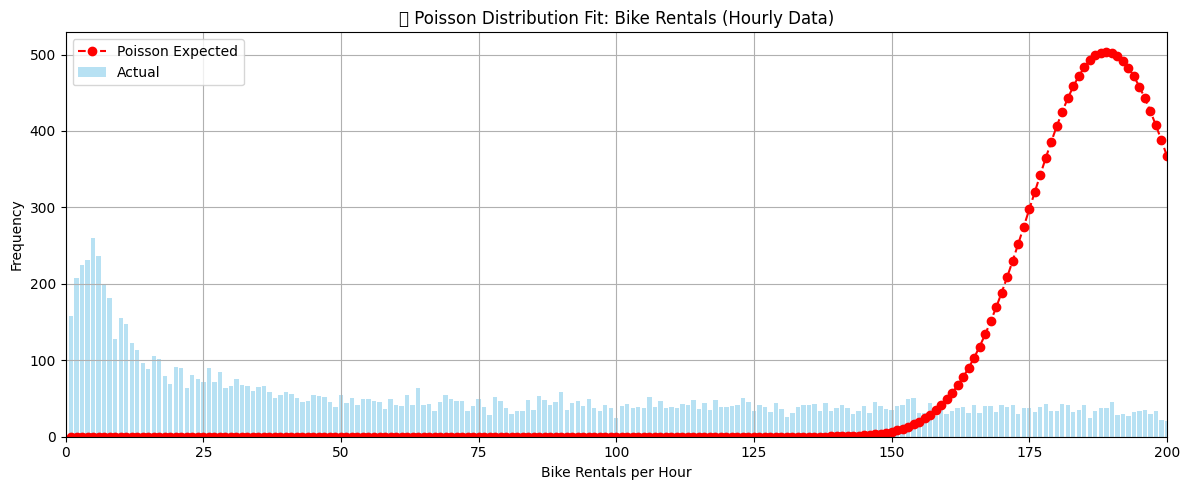

In [9]:

from scipy.stats import poisson

# Step 1: Load file from Colab
df = pd.read_csv('/content/hour.csv')

# Step 2: Use 'cnt' column (number of rentals per hour)
rental_counts = df['cnt']

# Step 3: Estimate λ (mean count)
λ = rental_counts.mean()
print(f"\nAverage bike rentals per hour (λ): {λ:.2f}")

# Step 4: Count how often each rental count occurs
count_freq = rental_counts.value_counts().sort_index()
x = count_freq.index

# Step 5: Compute Poisson expected frequencies
poisson_probs = poisson.pmf(x, mu=λ)  # ✅ Corrected line
expected_counts = poisson_probs * len(rental_counts)

# Step 6: Plot
plt.figure(figsize=(12, 5))
plt.bar(x, count_freq.values, alpha=0.6, label='Actual', color='skyblue')
plt.plot(x, expected_counts, 'r--o', label='Poisson Expected')
plt.xlim(0, 200)
plt.xlabel("Bike Rentals per Hour")
plt.ylabel("Frequency")
plt.title("📈 Poisson Distribution Fit: Bike Rentals (Hourly Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import math

# Step 1: Load data (already loaded earlier)
λ = df['cnt'].mean()
n = len(df)

# Step 2: Calculate stats
variance = λ
std_dev = math.sqrt(λ)
mode = math.floor(λ)
skewness = 1 / std_dev
kurtosis_excess = 1 / λ

# Step 3: Print summary
print("📊 Poisson Distribution Statistics (Based on 'cnt' column):")
print(f"Number of Observations: {n}")
print(f"Mean (λ): {λ:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Mode: {mode}")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis (Excess): {kurtosis_excess:.3f}")


📊 Poisson Distribution Statistics (Based on 'cnt' column):
Number of Observations: 17379
Mean (λ): 189.46
Variance: 189.46
Standard Deviation: 13.76
Mode: 189
Skewness: 0.073
Kurtosis (Excess): 0.005
